In [1]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

# Handling Data with Pandas

## Objectives

* Review different ways to pull data into pandas and the link between objects in python and pandas
* Understand the differences between a DataFrame and a Series
* Practice part of the ACES data exploration model
* Learn imputation strategies


## Code Dictionary

Each class we'll make sure there's one location that shows any new functionality introduced, with explanations of how each method works.


`pd.read_csv`: Reads in a csv file (by default) as a DataFrame. Does much more! check out [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html)

`pd.DataFrame`: Pandas' primary object, a 2-dimensional array (matrix).

`pd.Series`: Pandas' other object, a 1-dimensional array (vector).

functions | description
----------|------------
`.head()` | returns back the head of the pandas object (works for both DataFrame and Series)
`.describe()` | returns statistical results back for the pandas object. 
`.isnull()` | returns back true for each value if it is null. Opposite of `.notnull()`
`.dropna()` | returns back the object with the NA values dropped. `.dropna()` and the following four functions **do not** update the original pandas object. <br /> Can use the `inplace` argument to change that.
`.ffill()` | front fills the missing data.
`.bfill()` | back fills the missing data.
`.fillna()` | fills missing data with whatever pass in as an argument. 
`.apply()` | apply a function to either a series (column) or DataFrame (by row)

parameters | description
-----------|------------
`.columns` | returns back the columns
`.index` | returns back the index of the object
`[statement]` | commonly used for filtering to either a set of columns, rows, or data that is true to the boolean statement

## Lecture Notes

### A quick introduction to iPython Notebook:

Consider iPython notebook to be a great organization tool, but it takes much **practice** to keep it organized. Early recommendations while we practice using this tool in class:

1. It is very easy to want to edit previous python cells. Until you're really confortatable with Notebook, please don't! Everything that you run stays **in the notebook**, so the moment you accidentally delete code that you might have been using, you lose your work the next time you run the notebook.
2. The `mode` of Notebook is very similar to vim, so vim users should feel comfortable:
    1. The natural mode is a command mode. If you press `esc`, you should be in this mode. It's for gettinng around, changing cell types, and other commands. While in command mode, if you press `h`, it'll let you know anything else you can do.
    2. The other primary mode is edit mode. Pressing `return` on a cell will put you into edit mode (this would be similar to pressing `i` or `a` in vim). It's for editing cells, be they headers, markdown, code. We won't need nbconvert for the purposes of this course.
3. Most developers initialize a notebook with customized pandas settings. Examples of those defaults are included below:


In [2]:
import pandas as pd
import numpy as np
from __future__ import division
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


They are customizable to your taste, and we will add more later. 

### Exploratory Data Analysis

Primarily our goals for exploring data are the following:

* **A**ssemble.
* **C**lean.
* **E**xplore.
* **S**ummarize.

Today we will review some common pandas commands (provided above) to focus on for this data exploration model.

### Reading in Data

Pandas will work across a variety of data inputs, including csv, excel, JSON, and using additional python libraries to connect to databases. For today, we'll focus on using the csv input. We'll use data about heart disease from the UC Irvine Machine Learning data repository[1]. 

Given this directory: http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

There are a few different data types, some processed, some not, and a "names" file. The names file will expose for us the columns for the processed data:
```
7. Attribute Information:
-- Only 14 used
  -- 1. #3  (age)       
  -- 2. #4  (sex)       
  -- 3. #9  (cp)        
  -- 4. #10 (trestbps)  
  -- 5. #12 (chol)      
  -- 6. #16 (fbs)       
  -- 7. #19 (restecg)   
  -- 8. #32 (thalach)   
  -- 9. #38 (exang)     
  -- 10. #40 (oldpeak)   
  -- 11. #41 (slope)     
  -- 12. #44 (ca)        
  -- 13. #51 (thal)      
  -- 14. #58 (num)       (the predicted attribute)
```

Let's grab those fields as headers, and the processed cleveland data to work with in pandas (the .names file refers that this is the primary file used in research). Pandas io tools [2] handles http requests to grab files from the internet, though reminder that when doing so, it only saves the file in memory (in python), and not as a file on your machine.

In [3]:
header_row = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',]
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
heart_data = pd.read_csv(url, header=0, na_values='?')
heart_data.columns = header_row

In [4]:
display(heart_data.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


### Pandas is really just python
Pandas is a library for python, built heavily around the task of manipulating and presenting data. If you're writing pandas code, you're writing python code! Pandas contains (primarily) two new python objects:

* **DataFrame**: a wrapper around a 2 dimensional numpy ndarray (in math, we call this a matrix)
* **Series**: a wrapper around a 1 dimensional numpy ndarray (in math, we call this a vector)

### Math Jargon

When working through data matrices and vectors, we'll also often use the words feature and observation. 

* **Feature**: a feature is represented by a column. It is a segmentation of your data. Features are usually either continuous values (representing -inf to inf, and 1 < 2) or categorical values (each value represents its own space; 1 !< 2).
* **Observation**: an observation is a row of your data. It should represent a single entity (for example, a survey responder).
* **Target Variable**: often we'll be working with a column called a target variable, or predicted value. In data analysis, it is often the goal to be able to statistically explain this variable using the observations and features.

### DataFrames behave like lists
DataFrames support many of the functionalities of lists, like slicing.

In [5]:
## Lists
import random
random_list = [random.random() for i in range(300)]

print(random_list[3:14])
print(random_list[280:])
print(random_list[:20])


#print len(random_list)
print(len(random_list))

## DataFrame
print(heart_data[3:14])
print(heart_data[280:])
print(heart_data[:20])

print(len(heart_data))

[0.7471055916737718, 0.5280413914356494, 0.9117194979258606, 0.3998542262129138, 0.9276094980423176, 0.8599829467634272, 0.8203576472461216, 0.20960710272748984, 0.39058458316732947, 0.6943137414912607, 0.34896522716319844]
[0.7735353785541321, 0.7948111558093434, 0.4385840052595127, 0.8137878328755556, 0.8281168518889602, 0.7136057666670524, 0.10571022676304465, 0.09646838572558425, 0.6016772992849032, 0.7665752501968023, 0.9936634367265725, 0.47545988438644327, 0.33122583685116114, 0.9680459546379847, 0.9746882525234024, 0.4470318060854468, 0.4475354502084068, 0.12527696526795062, 0.7768088953776799, 0.8547504312853076]
[0.7141515032546951, 0.7035715795303413, 0.48952238871200027, 0.7471055916737718, 0.5280413914356494, 0.9117194979258606, 0.3998542262129138, 0.9276094980423176, 0.8599829467634272, 0.8203576472461216, 0.20960710272748984, 0.39058458316732947, 0.6943137414912607, 0.34896522716319844, 0.048775504092104405, 0.25423392056244554, 0.0845218566937953, 0.4665292066688408, 0.

### DataFrames also behave like dictionaries
DataFrames support returning by column in a similar way a dictionary returns by key. Note that passing in a string for a key will return a pandas **Series**, while a list of keys will return a **DataFrame**.

The following table of code shows similar code, dependent on your object type:

action | dictionary | DataFrame
-------|-----------|----------
return values for a key | `some_dict['a']` | `heart_data['age']`
creating a new key | `some_dict['d'] = [i**2 for i in some_dictionary['a']]` | `heart_data['random_var'] = random.random()`
filtering results for a key | `[i for i in some_dict['a'] if i > .5]` | `heart_data[heart_data['random_var'] >.7]`


In [6]:
## Dictionary
some_dict = {k: [random.random() for i in range(20)] for k in ['a', 'b', 'c',]}
some_dict['d'] = [i**2 for i in some_dict['a']]

print(some_dict['a'])
print(some_dict['b'])
my_list = [i for i in some_dict['a'] if i > .5]
new_list = [i for i in some_dict['a'] if i < .5]
print(len(my_list), len(new_list))

## DataFrame
heart_data['random_var'] = [random.random() for i in heart_data.index]

print(heart_data['age'].head())
print(heart_data['sex'].head())
print(heart_data[['cp', 'oldpeak']].head())

# Note on Printing Types -- What do we get back?
print(type(heart_data['sex']))
print(type(heart_data[['sex']]))
print(type(heart_data[['cp', 'oldpeak']]))

# Creating a subset:
# Since random.random uses a flat distribution, consider the below as one approach to pick a random subset.
heart_subset = heart_data[heart_data['random_var'] >.7].head()

[0.6436466991016065, 0.2051095833263188, 0.9973183538210248, 0.18250370738759436, 0.7366356091900517, 0.8038093875115413, 0.14329688546273256, 0.506622536857997, 0.7148489353575185, 0.6088591569067228, 0.6396981206766297, 0.928156093383576, 0.6127535797508061, 0.7551797446511991, 0.7782307992011699, 0.9312303510766997, 0.7938993662902731, 0.8574154584145276, 0.8597948322400186, 0.06313990316838736]
[0.22137013796005955, 0.18558028517731917, 0.7875498942933196, 0.03396787699489123, 0.9140141610314322, 0.9685256656541941, 0.6242698404619783, 0.9370188060501164, 0.05444829240204929, 0.34145725554720563, 0.44088823090243423, 0.5115308059379712, 0.6046582120002343, 0.7660258340810235, 0.8948435972145734, 0.20004597356412268, 0.6729131116890501, 0.7844787984511298, 0.9212110995175309, 0.9454587309354044]
16 4
0    67.0
1    67.0
2    37.0
3    41.0
4    56.0
Name: age, dtype: float64
0    1.0
1    1.0
2    1.0
3    0.0
4    1.0
Name: sex, dtype: float64
    cp  oldpeak
0  4.0      1.5
1  4.0

### Practice: Selecting and subsetting data

Let's write code to do the following things:

1. Return back the `head()` of the `chol` column
2. Return back all rows where `thalach` is below 150.
3. Return back all rows where `age` is above the median (hint, you can get the median of a column using `df.col.median()`)
4. Summarise the resting heart beat rate when the pain type is asymptomatic (look up columns in the text file, and use `.describe()`)


In [7]:
print(heart_data["chol"].head())
display(heart_data[heart_data["thalach"] < 150].head())
display(heart_data[heart_data["age"] > heart_data.age.median()].head())
print(heart_data.columns)
heart_data.describe()["trestbps"]

0    286.0
1    229.0
2    250.0
3    204.0
4    236.0
Name: chol, dtype: float64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,random_var
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0.133175
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0.290954
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2,0.015575
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0,0.659729
11,56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2,0.694146


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,random_var
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,0.133175
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0.290954
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,0.048360
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3,0.136052
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0,0.151918


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'random_var'], dtype='object')


count    302.000000
mean     131.645695
std       17.612202
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

### Cleaning Data

Our primary task for today to clean is to find and handle missing values. Data can be missing for different reasons:

* There was no response value. This is common in True/False data, where True could be a yes, False, could be a no, and NA just means there was no answer.
* The data was poorly handled. Missing data happens all the time on poor data imports.
* The missing data really should have just been a 0.

To find missing data, we can use pandas `.describe()` function, which uses `count` as a "count of non null values" field, and the `.isnull()` function once we've identified rows missing data.


In [8]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,random_var
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,298.000000,300.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397,0.465604
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.938202,1.941563,1.229384,0.294659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.009357
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.187223
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.453377
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,0.704497
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,0.987259


In [9]:
## Looks like we have 4 missing values in the ca column, or the number of primary vessels, so let's focus on that one first.
print(heart_data[heart_data['ca'].isnull()])

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  num  random_var
165  52.0  1.0  3.0     138.0  223.0  0.0      0.0    169.0    0.0      0.0    1.0 NaN   3.0    0    0.767685
191  43.0  1.0  4.0     132.0  247.0  1.0      2.0    143.0    1.0      0.1    2.0 NaN   7.0    1    0.198017
286  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4    2.0 NaN   7.0    0    0.116917
301  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0    1.0 NaN   3.0    0    0.176680


We can choose the handle the data a few different ways. This handling is called data imputation.

1. Remove the data. This makes sense if we think it's bad data.
2. Fill the data. Common techniques would be to fill with some default value (0), or backfill/forwardfill the data, based on the sort.
3. interpolate the data. This technique is an estimation, sometimes with machine learning techniques. More on this later!

In [10]:
""" Trial 1: Drop missing values. 
Pandas defines this on the axis (think axis of a matrix):
0: along the columns
1: along the rows
"""
print(heart_data[285:290])

dropped_rows_heart_data = heart_data.dropna()
dropped_ca_thal_heart_data = heart_data.dropna(1)

print(dropped_rows_heart_data[285:290])
print(dropped_ca_thal_heart_data[285:290])

""" Trial 2: Fill the data
.ffill(): fills forward
.bfill(): fills backward
.fillna(): fills based on some value
"""
print(heart_data[285:290]['ca'].ffill())
print(heart_data[285:290]['ca'].bfill())
print(heart_data[285:290]['ca'].fillna(0)) # fill with 0s
print(heart_data['ca'][285:290].fillna(int(heart_data['ca'].mode()))) # fill with the most common value

      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num  random_var
285  58.0  0.0  4.0     170.0  225.0  1.0      2.0    146.0    1.0      2.8    2.0  2.0   6.0    2    0.628224
286  58.0  1.0  2.0     125.0  220.0  0.0      0.0    144.0    0.0      0.4    2.0  NaN   7.0    0    0.116917
287  56.0  1.0  2.0     130.0  221.0  0.0      2.0    163.0    0.0      0.0    1.0  0.0   7.0    0    0.773842
288  56.0  1.0  2.0     120.0  240.0  0.0      0.0    169.0    0.0      0.0    3.0  0.0   3.0    0    0.920109
289  67.0  1.0  3.0     152.0  212.0  0.0      2.0    150.0    0.0      0.8    2.0  0.0   7.0    1    0.353501
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  slope   ca  thal  num  random_var
290  55.0  0.0  2.0     132.0  342.0  0.0      0.0    166.0    0.0      1.2    1.0  0.0   3.0    0    0.758747
291  44.0  1.0  4.0     120.0  169.0  0.0      0.0    144.0    1.0      2.8    3.0  0.0   6.0    2    0.031200
2

### Practice Together: Filling Missing Data

One other column was missing data in the heart disease data set.

1. You can find it if you look at your counts in .describe. What was it?
2. Look up the information about that column in the names file. What is that column about?
3. Determine three different ways to fill that column. Which ways seems most ideal for this case?

### Constructing new data

One commont technique to data manipulation is to generate new data based on data already in the DataFrame. Pandas uses a function called `.apply()` in order to run such functions, either named functions (`def`) or nameless functions (`lambda`). `apply()` is particularly helpful for iterating through pandas data.

Try it out by making a function where the patients resting heart beat (trestbps) was higher than their maximum heart rate achieved (thalach).

In [11]:
def high_resting(row):
    if row['trestbps'] > row['thalach']:
        return 1
    else:
        return 0

# axis = 1 means what again?
heart_data['high_resting'] = heart_data.apply(high_resting, axis=1)

# This would work the same way!
heart_data['high_resting'] = heart_data.apply(lambda row: 1 if row['trestbps'] > row['thalach'] else 0, axis=1)

# axis = 0 means what again?
heart_data['resting2x'] = heart_data['trestbps'].apply(lambda x: x*2)

## On Your Own

You're going work on similar questions with another data set from UC Irvine on vehicle mileage per gallon. You can find it with this link:

http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

1. Bring the data into a DataFrame with pandas. The file is `auto-mpg.data`. Since it is space seperated, you'll have to tell read_csv to use spaces (`'\s+'`) and not commas (`','`) as the delimeter. Likewise, you have to name the columns.
2. Compare the data for cars from the year 1970 and the year 1982. In general in this data set, have cars changed in terms of mpg, horsepower, etc? (any of the continuous values)
3. Horsepower is missing several values. What are some basic techniques to fill in the missing data?

** more advanced **

4. Consider splitting the data by year and filling in horsepower that way. What would the python code look like to hande this?
5. A handy way to work with strings is to `.split()` them by a value into a python list. Write an `apply()` function that generates a new column called "manufacturer," using the last column's data.

In [17]:
mpg = pd.read_csv("auto-mpg.data", delimiter="\s+")
mpg.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
print(mpg.head())
mpg[mpg["model year"] == "70" | mpg["model year"] == "82"].plot("model year", "mpg")
mpg[mpg["model year"] == "70" | mpg["model year"] == "82"].plot("model year", "horsepower")
mpg["horsepower"].ffill()
mpg[mpg["year"] == "70"].ffill()
mpg[mpg["year"] == "82"].ffill()
mpg["manufacturer"] = mpg["model"].apply(lambda x: x.split(" ")[0])

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  origin            car name
0  15.0          8         350.0      165.0  3693.0          11.5          70       1   buick skylark 320
1  18.0          8         318.0      150.0  3436.0          11.0          70       1  plymouth satellite
2  16.0          8         304.0      150.0  3433.0          12.0          70       1       amc rebel sst
3  17.0          8         302.0      140.0  3449.0          10.5          70       1         ford torino
4  15.0          8         429.0      198.0  4341.0          10.0          70       1    ford galaxie 500


TypeError: Cannot perform 'ror_' with a dtyped [int64] array and scalar of type [bool]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

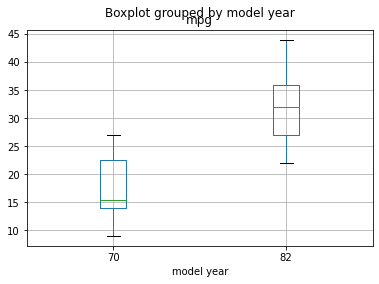

In [34]:
mpg[mpg["model year"].isin([70, 82])].boxplot("mpg", "model year")
mpg.dtypes

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

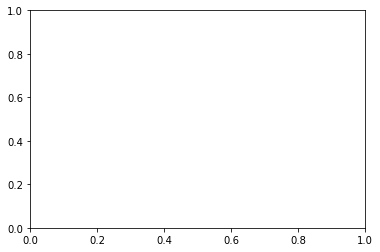

In [31]:
mpg[mpg["model year"].isin([70, 82])].dropna().boxplot("horsepower", "model year")


## Review, Next Steps, Reading

For next class:

0. On our off day, please review this whole notebook again, and make sure you can follow along without guidance! Use slack when you have questions. You should do this with each class notebook.
1. Read through the documentation for [split, apply, combine](http://pandas.pydata.org/pandas-docs/stable/groupby.html). It's a technique we will be using in more detail with the next few classes.
2. To understand the choices in data storage, read about [tidy data](http://vita.had.co.nz/papers/tidy-data.pdf). 
3. Additional resource for [tidy data](http://www.prometheusresearch.com/good-data-management-practices-for-data-analysis-tidy-data-part-2/).
4. The two visualisation packages we will be using are [matplotlib](http://matplotlib.org/) and [seaborn](http://stanford.edu/~mwaskom/software/seaborn/). Consider trying out some sample code. You'll need to install seaborn with `conda`. We'll do that as a class on Wednesday.
5. Questions to think about when doing [Exploratory Data Analysis](http://www.itl.nist.gov/div898/handbook/eda/section3/eda32.htm)

###### Resource links from today
1. [UC Irvine Data Repository](http://archive.ics.uci.edu/ml/)
2. [Pandas IO Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#data-in-out)